# Lab 2 Supervised Learning - Classification on Handwritten Digits Data Set

MNIST Dataset ("Modified National Institute of Standards and Technology") represents the "Hello World" dataset for computer vision. It is an image of handwritten numbers. The goal is to build a model able to detect the numbers corresponding to each image.

The original MNIST dataset contains 70 000 images, on grey scale, of 28 x 28 pixels.

During this tutorial, we use a reduced sample of MNIST, in order to build and evaluate a k-NN model.

The dataset we are interested in during this Lab is made of 8x8 images of handwritten digits. Each image is accompanied by a 'target' value, which gives information about the digit represented on the image.

We want to build a model capable of automatically detecting the value of the handwritten digit.

Rhis lab objectives are:

1. Import and explore image data
2. Divide the data into Training and Test sets
3. Build supervised learning models from the training data
4. Observe the effect of the choice of the K-NN parameter k on the model predictions
5. Measure the performance of the model




First, let's import the libraries we will need

In [1]:
# Import matplotlib for data visualisation
import matplotlib.pyplot as plt
#Import scikit-learn metrics module for our models' evaluations
from sklearn import metrics
#Import scikit-learn dataset library
from sklearn import datasets

# 1. Data loading and exploration

Let's load the dataset from the scikit-learn library.


In [2]:
#Load dataset
digits = datasets.load_digits()

#### Exploring data

After loading the dataset, we will explore it and see what it is made of.. 

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
print(digits.images.shape)

(1797, 8, 8)


In [5]:
print(digits.target.shape)

(1797,)


In [6]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [7]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
#print(digits.feature_names)

there are 10 classes of data, one class for each digit from 0 to 9.

In [9]:
n= 22
print (digits.images[n].shape)
print(digits.images[n])

(8, 8)
[[ 0.  0.  8. 16.  5.  0.  0.  0.]
 [ 0.  1. 13. 11. 16.  0.  0.  0.]
 [ 0.  0. 10.  0. 13.  3.  0.  0.]
 [ 0.  0.  3.  1. 16.  1.  0.  0.]
 [ 0.  0.  0.  9. 12.  0.  0.  0.]
 [ 0.  0.  3. 15.  5.  0.  0.  0.]
 [ 0.  0. 14. 15.  8.  8.  3.  0.]
 [ 0.  0.  7. 12. 12. 12. 13.  1.]]


Let's take a closer look at the images.

<Figure size 432x288 with 0 Axes>

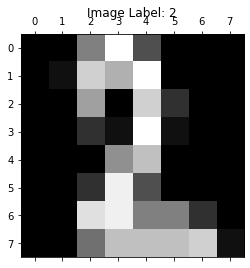

In [10]:
n=22
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[n]) 
plt.title('Image Label: %i' % digits.target[n])
plt.show()


In [15]:
n= 22
print (digits.data[n].shape)
print(digits.data[n])

(64,)
[ 0.  0.  8. 16.  5.  0.  0.  0.  0.  1. 13. 11. 16.  0.  0.  0.  0.  0.
 10.  0. 13.  3.  0.  0.  0.  0.  3.  1. 16.  1.  0.  0.  0.  0.  0.  9.
 12.  0.  0.  0.  0.  0.  3. 15.  5.  0.  0.  0.  0.  0. 14. 15.  8.  8.
  3.  0.  0.  0.  7. 12. 12. 12. 13.  1.]


In [16]:
print (digits.data.shape)

(1797, 64)


Let us observe the images with their respective labels

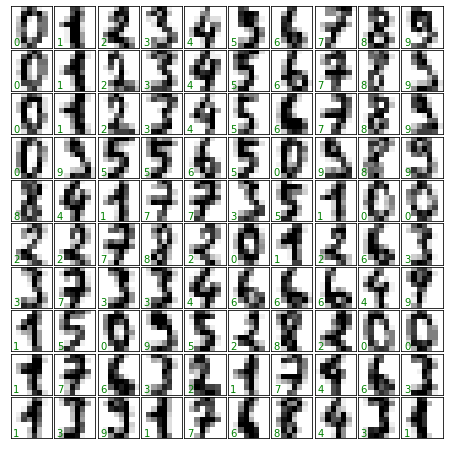

In [11]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), color ='green')

We want to know if our classes are balanced, so we draw a bar chart, such that the height of the bars represents the number of examples for each class

<BarContainer object of 10 artists>

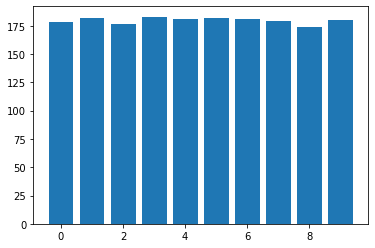

In [13]:
import collections
w=collections.Counter(digits.target)
plt.bar(w.keys(), w.values())

We can clearly see that the classes are well balanced.

## 2. Divide the data into training and test sets¶

It is important to divide the data into training and test sets to analyze the performance of the models.

We use the train_test_split() function for this.. 

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=5) # 70% training and 30% test

Let's display the dimensions of the obtained sets

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


In [16]:
X_train[10]

array([ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12.,
       12.,  5.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
       15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,  8., 15.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0.,
        1., 13.,  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.])

### Feature normalization

The intensity of the pixels being between 0 and 255, we proceed to a min-max normalization, which amounts here to divide the values by 255.

This step allows us to obtain values between 0 and 1.

In [17]:
X_train, X_test = X_train / 255.0, X_test / 255.0


To check that the data is in a correct format, let's display the first 64 images of the training, and the name of the class corresponding to each image.


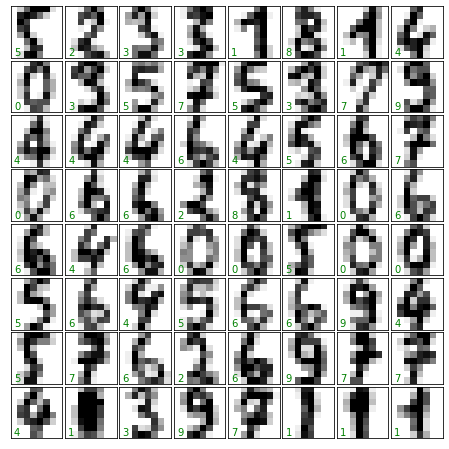

In [18]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]), color ='green')
    

Let's check that the Train and Test data are well balanced

<BarContainer object of 10 artists>

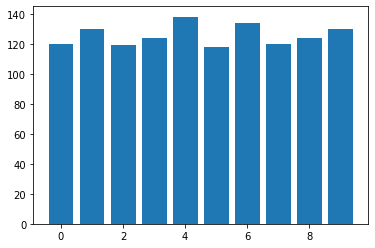

In [20]:
import collections
w=collections.Counter(y_train)
plt.bar(w.keys(), w.values())

<BarContainer object of 10 artists>

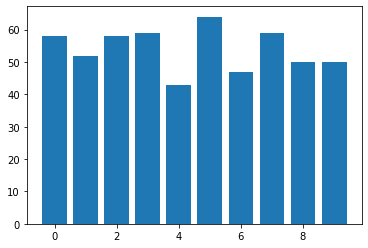

In [21]:
import collections
w=collections.Counter(y_test)
plt.bar(w.keys(), w.values())

# 3. K-NN Classififcateur 

Let's build a supervised learning model from the training data. Let's use the k-NN model.

To do this, we need to follow the following steps:

    Instantiate a KNeighborsClassifier object
    
    Learn the model from the training data (.fit)
    
    Compute the prediction on the test data

In [22]:
from sklearn import neighbors

#Create a KNN Classifier
# kNN model requires you to specify n_neighbors
classifierKNN = neighbors.KNeighborsClassifier(n_neighbors = 5)

#Train the model using the training sets
classifierKNN.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test_KNN = classifierKNN.predict(X_test)

### Observation 

Let us observe the results by examining the images.

<Figure size 432x288 with 0 Axes>

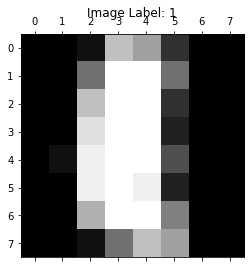

valeur prédite: [1]


In [24]:
n = 1760
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[n]) 
plt.title('Image Label: %i' % digits.target[n])
plt.show()

print('valeur prédite: '+str(classifierKNN.predict(digits.data[n,:].reshape(1, -1))))

Let's display the first 64 predictions of the test data.  The correctly predicted labels are displayed in green. The wrong ones are in red.

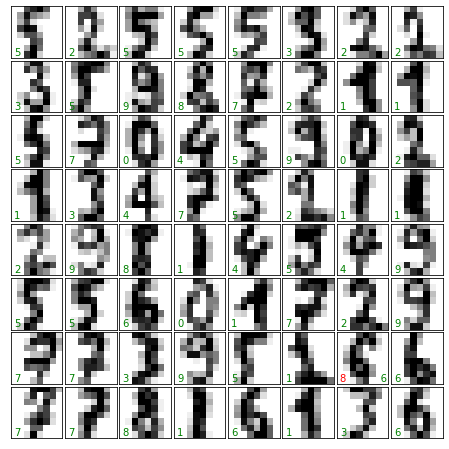

In [40]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    # label the image with the target value
    if y_pred_test_KNN[i] == y_test[i]:
        ax.text(0, 7, str(y_pred_test_KNN[i]), color='green')
    else:
        ax.text(0, 7, str(y_pred_test_KNN[i]), color='red')
        ax.text(0, 7, '             '+str(y_test[i]), color='green')

It would be interesting to display only the errors

ERRORS NUMBER:  8


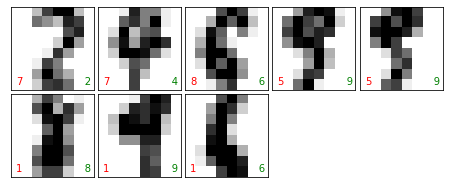

In [25]:

nbrError = 0
for i in range(540):
    if y_pred_test_KNN[i] != y_test[i]:
        nbrError = nbrError +1
print("ERRORS NUMBER: ",nbrError)    
        
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
j = 0
for i in range(540):
    # label the image with the target value
    if y_pred_test_KNN[i] != y_test[i]:
        ax = fig.add_subplot(5, 5, j + 1, xticks=[], yticks=[])
        ax.imshow(X_test[i].reshape( 8, 8), cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(y_pred_test_KNN[i]), color='red')
        ax.text(0, 7, '                      '+str(y_test[i]), color='green')
        j = j +1
        

8 errors out of 540 test examples. What do you think of the model?

## What if we change k value?

let's build a model with k = 7

In [26]:
#Create a KNN Classifier
# kNN model requires you to specify n_neighbors
classifierKNN = neighbors.KNeighborsClassifier(n_neighbors = 7)

#Train the model using the training sets
classifierKNN.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test_KNN = classifierKNN.predict(X_test)

ERRORS NUMBER :  8


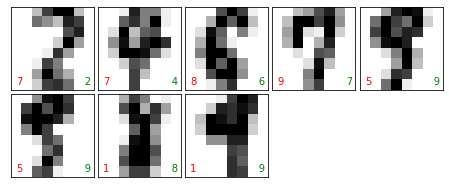

In [27]:

nbrError = 0
for i in range(540):
    if y_pred_test_KNN[i] != y_test[i]:
        nbrError = nbrError +1
print("ERRORS NUMBER : ",nbrError)    
        
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
j = 0
for i in range(540):
    # label the image with the target value
    if y_pred_test_KNN[i] != y_test[i]:
        ax = fig.add_subplot(5, 5, j + 1, xticks=[], yticks=[])
        ax.imshow(X_test[i].reshape( 8, 8), cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(y_pred_test_KNN[i]), color='red')
        ax.text(0, 7, '                      '+str(y_test[i]), color='green')
        j = j +1
        

The number of errors is the same at k = 5. But are the errors the same? ....

let's try with k = 11

In [28]:
#Create a KNN Classifier
# kNN model requires you to specify n_neighbors
classifierKNN = neighbors.KNeighborsClassifier(n_neighbors = 11)

#Train the model using the training sets
classifierKNN.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test_KNN = classifierKNN.predict(X_test)

ERRORS NUMBER:  11


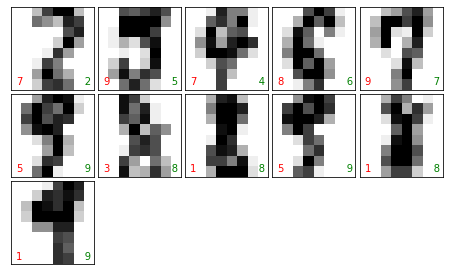

In [30]:
#Affichons d'abord le nombre d'erreur
nbrError = 0
for i in range(540):
    if y_pred_test_KNN[i] != y_test[i]:
        nbrError = nbrError +1
print("ERRORS NUMBER: ",nbrError)    
        
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
j = 0
for i in range(540):
    # label the image with the target value
    if y_pred_test_KNN[i] != y_test[i]:
        ax = fig.add_subplot(5, 5, j + 1, xticks=[], yticks=[])
        ax.imshow(X_test[i].reshape( 8, 8), cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(y_pred_test_KNN[i]), color='red')
        ax.text(0, 7, '                      '+str(y_test[i]), color='green')
        j = j +1
        

what number of neighborhoods to choose?

## 4.  Model Evaluation
This is a multi-class classification. The default strategy is One Vs Rest (One Vs All)

Reminder:

Accuracy = Number of correct predictions / Total number of predictions

Precision: On the positive predicted elements, the proportion of the really positive ones

Recall: On the really positive items, the proportion of the well classified (classified positive)

We compare these metrics on the training and test data


Let's display a classification summary and the confusion matrix

In [33]:
print(metrics.classification_report(y_test, y_pred_test_KNN))

print(metrics.confusion_matrix(y_test, y_pred_test_KNN))
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.95      1.00      0.97        52
           2       1.00      0.98      0.99        58
           3       0.98      1.00      0.99        59
           4       1.00      0.98      0.99        43
           5       0.97      0.98      0.98        64
           6       1.00      0.98      0.99        47
           7       0.97      0.98      0.97        59
           8       0.98      0.94      0.96        50
           9       0.96      0.94      0.95        50

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

[[58  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  1  0  0]
 [ 0  0  0 59  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  1  0  0]
 [ 0  0  0  0  0 63  0  0  0  1]
 [ 0  0  0  0  0  0 46  0  1  0]
 [ 0  0  0

In [34]:
# Model Accuracy: how often is the classifier correct?
print("test Accuracy:",metrics.accuracy_score(y_test, y_pred_test_KNN))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Test Precision:",metrics.precision_score(y_test, y_pred_test_KNN, average = "weighted"))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Test Recall:",metrics.recall_score(y_test, y_pred_test_KNN, average = "weighted"))

test Accuracy: 0.9796296296296296
Test Precision: 0.9799294862985338
Test Recall: 0.9796296296296296
